<a href="https://colab.research.google.com/github/SravyaChadalavada/Harnessing-Machine-Learning-for-Reliable-Solar-Power-Generation-Forecasting/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

generation_data = pd.read_csv('Plant_2_Generation_Data.csv')
weather_station_data = pd.read_csv('/Plant_2_Weather_Sensor_Data.csv')
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_station_data.drop(columns = ['PLANT_ID','SOURCE_KEY']), on='DATE_TIME')
print(df_solar)

                 DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0      2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1      2020-05-15 00:00:00  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2      2020-05-15 00:00:00  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3      2020-05-15 00:00:00  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4      2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
...                    ...              ...       ...       ...          ...   
67693  2020-06-17 23:45:00  q49J1IKaHRwDQnt       0.0       0.0  4157.000000   
67694  2020-06-17 23:45:00  rrq4fwE8jgrTyWY       0.0       0.0  3931.000000   
67695  2020-06-17 23:45:00  vOuJvMaM2sgwLmb       0.0       0.0  4322.000000   
67696  2020-06-17 23:45:00  xMbIugepa2P7lBB       0.0       0.0  4218.000000   
67697  2020-06-17 23:45:00  xoJJ8DcxJEcupym       0.0       0.0  4316.000000   

        TOTAL_YIELD  AMBIENT_TEMPERATUR

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')
weather_station_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')
df_solar = pd.merge(
    generation_data.drop(columns=['PLANT_ID']),
    weather_station_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)

# Drop unnecessary columns
df_solar = df_solar.drop(columns=['SOURCE_KEY', 'DATE_TIME'])

# Separate features and target variable
X = df_solar.drop(columns=['TOTAL_YIELD']).values
y = df_solar['TOTAL_YIELD'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mape'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae, mape = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")
print(f"Test MAPE: {mape}")

# Make predictions
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Test RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"Test R-squared: {r2}")

# Display all metrics
print("Predictions:", predictions)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1354/1354 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 975575707885240320.0000 - mae: 663161728.0000 - mape: 705526366208.0000 - val_loss: 958718133047132160.0000 - val_mae: 653029824.0000 - val_mape: 18200112660480.0000
Epoch 2/100
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 963293132210831360.0000 - mae: 656017344.0000 - mape: 45110922313728.0000 - val_loss: 923839768788205568.0000 - val_mae: 640109696.0000 - val_mape: 213155049373696.0000
Epoch 3/100
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 912152922257620992.0000 - mae: 637338560.0000 - mape: 322775180902400.0000 - val_loss: 833400814235025408.0000 - val_mae: 610428864.0000 - val_mape: 775003092025344.0000
Epoch 4/100
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 821912704431161344.0000 - mae: 615161536.0000 - mape: 963446661185536.0000 - val_loss: 712362519800315904.0000 - val_mae: 593819520.0000 - val_mape: 1737337759334400.0000
Epoch 5/100
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 693309357680492544.00

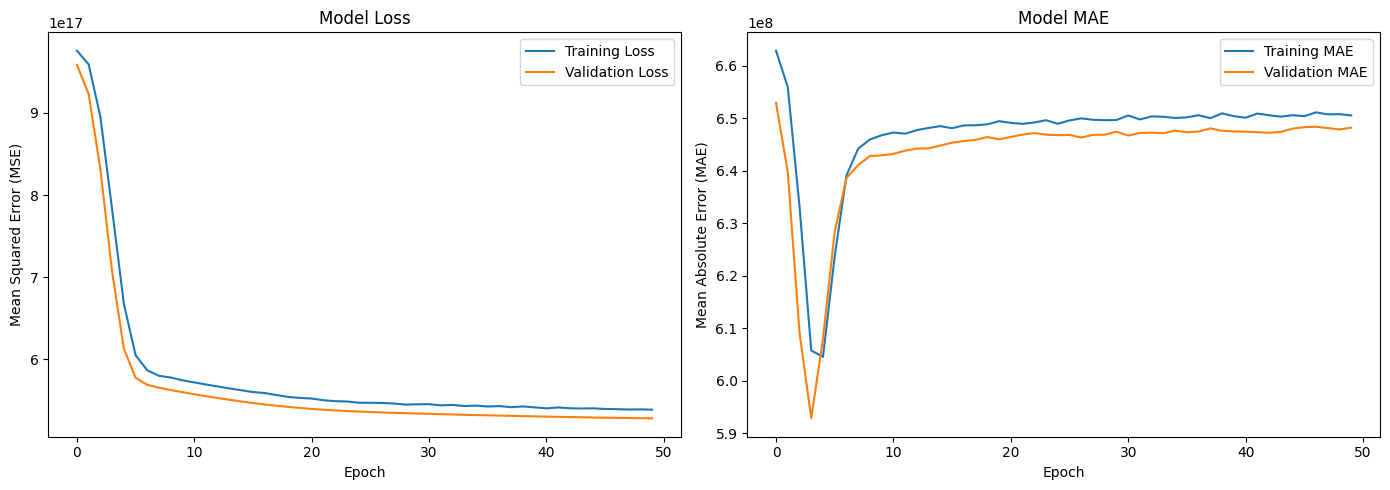

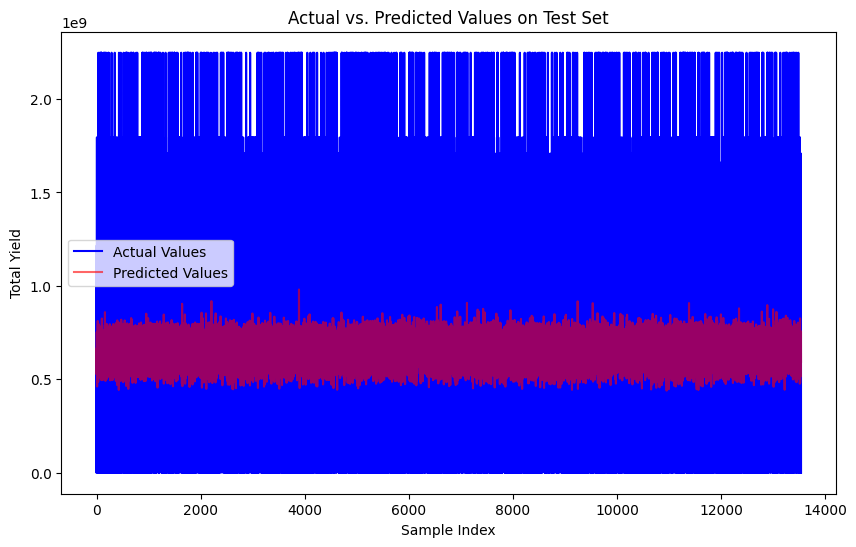

<ipython-input-25-fdc0ebc7a36a>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='red')


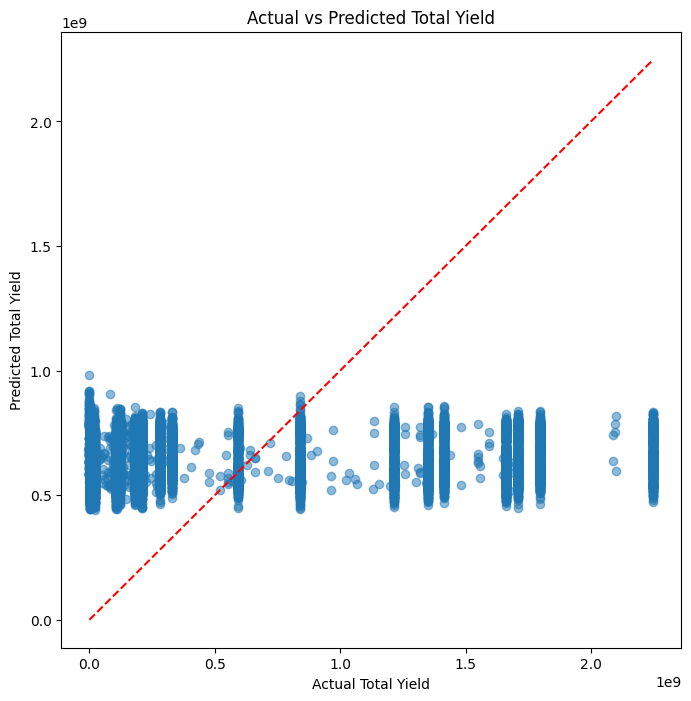

In [ ]:
import matplotlib.pyplot as plt

# Visualize training and validation loss and MAE over epochs
# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize predictions vs. actual values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Values')
plt.plot(predictions, color='red', label='Predicted Values', alpha=0.6)
plt.title('Actual vs. Predicted Values on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Total Yield')
plt.legend()
plt.show()

# Optional: Plot predicted vs actual in a diagonal plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='red')
plt.xlabel('Actual Total Yield')
plt.ylabel('Predicted Total Yield')
plt.title('Actual vs Predicted Total Yield')
plt.show()


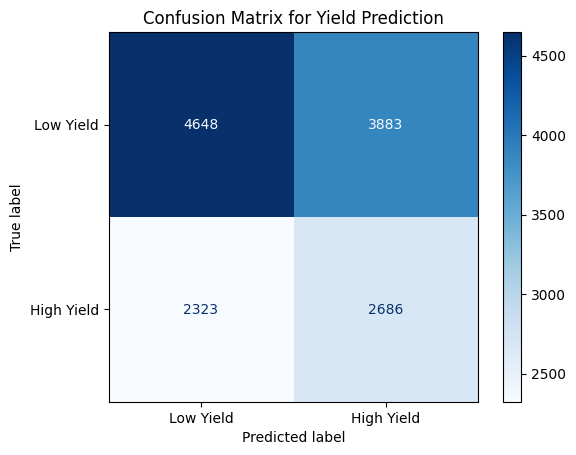

In [ ]:

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define a threshold for "high yield" vs. "low yield"
threshold = y_test.mean()  # Example threshold, could be set as desired

# Binarize predictions and actual values
y_test_binary = [1 if y > threshold else 0 for y in y_test]
predictions_binary = [1 if y > threshold else 0 for y in predictions]

# Calculate the confusion matrix
cm = confusion_matrix(y_test_binary, predictions_binary)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Yield", "High Yield"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Yield Prediction")
plt.show()

